<a href="https://colab.research.google.com/github/sazed49/PyTorch_Basics/blob/main/01_PyTorch_Workflow_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.9.0+cu126'

## 1. Data preparing and loading

In [ ]:
# create known parameters
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

###Spliting the data

In [ ]:
 #creae train/test split
 train_split=int(0.8*len(X))
 X_train,y_train=X[:train_split],y[:train_split]
 X_test,y_test=X[train_split:],y[train_split:]
 len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

Visualize data

In [ ]:
 def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):

  """
  plots training and test data and compares predicitons
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label="trainig_data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="test_data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14})

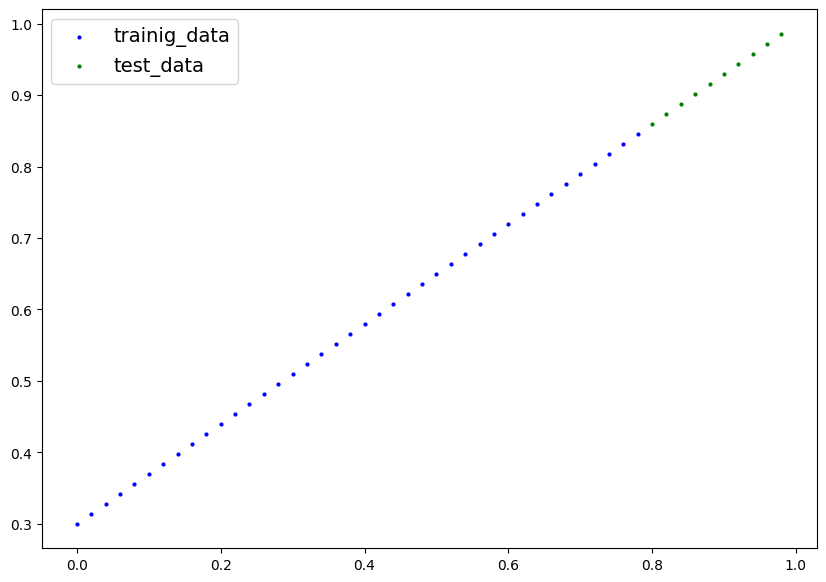

In [ ]:
 plot_predictions()

##2. Building model

In [ ]:
 from torch import nn
# create linear Regression Model Class
 class LinearRegressionModel(nn.Module):# -<almost everything in pytorh inherots from nn.Module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias



### PyTorch model building essentials
* torch.nn- contains all of the building blocks for computational graph.
* torch.nn.parameter- what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module- The base class for all neural network modules, if you subclass it, you should overwrite the forward()
* torch.optim- this is where the optimizers live, they will help with gradient descent

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions using "torch.inference_mode()"


In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds
#with torch.no_grad():
  #y_preds=model_0(X_test)
#y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

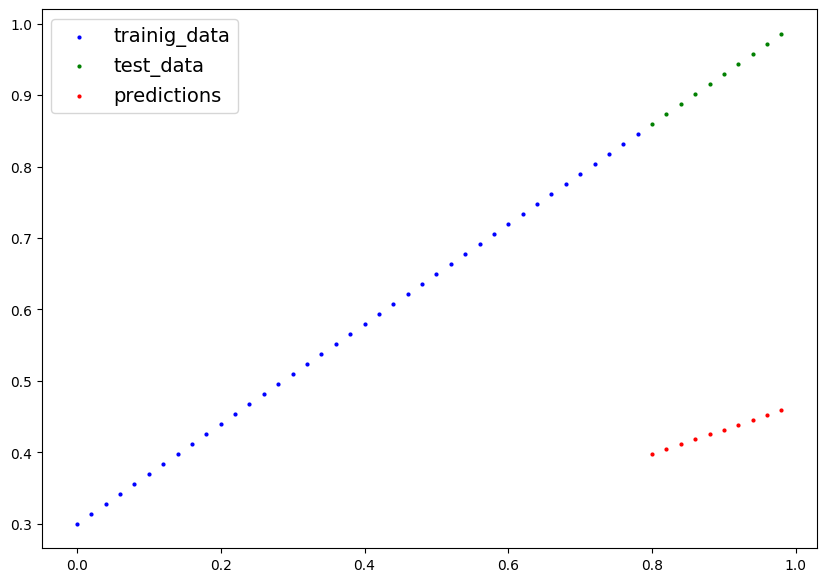

In [ ]:
plot_predictions(predictions=y_preds)

## 3.Train Model
For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#set up a loss function
loss_fn=nn.L1Loss()

#set up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)


In [ ]:
loss_fn

L1Loss()

### Building a Training and testing Loop
1. Loop through the data.
2. Forward pass.
3. Calculate the loss.
4. Optimizer zero grad.
5. Back Propagation- calculate the gradients of each parameters with respect to loss.
6. Update the optimizer (gradient descent)-Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.


In [ ]:
torch.manual_seed(42)
epochs=1
### training
#1. Loop through the data
for epochs in range(epochs):
  model_0.train() # sets all the parameters that require gradients
  #2. forward pass
  y_pred=model_0(X_train)
  #3. Calculate the loss
  loss=loss_fn(y_pred,y_train)
  print(f"loss:{loss}")
  #4. optimizer zero grad
  optimizer.zero_grad()
  #5. Back Propagation- calculate the gradients of each parameters with respect to loss.
  loss.backward()
  #6.update the optimizer (perform gradient descent)
  optimizer.step()







loss:0.26679736375808716


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
y_preds_new

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])

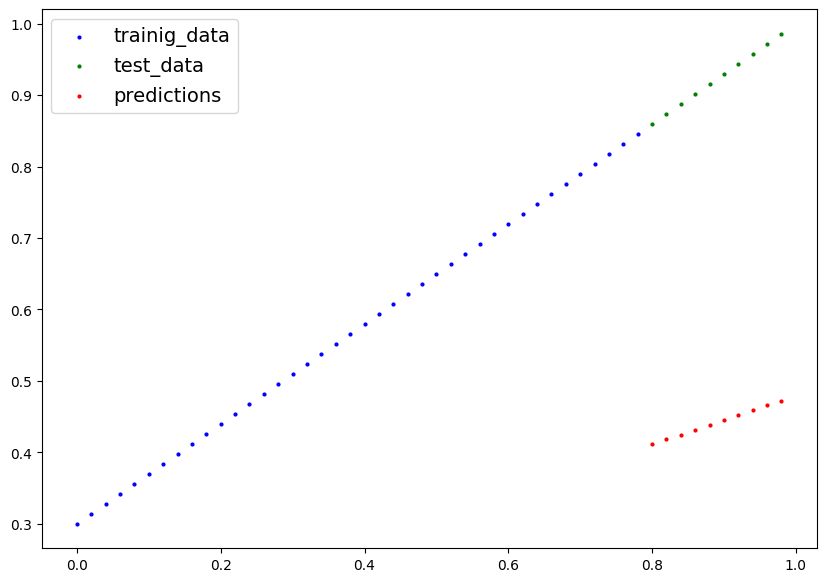

In [ ]:
plot_predictions(predictions=y_preds_new)

### putting all together

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
#1. Loop through he data
for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 2. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 3. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 4. Zero grad of the optimizer
    optimizer.zero_grad()

    # 5. Loss backwards
    loss.backward()

    # 6. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.41371020674705505 
Epoch: 10 | MAE Train Loss: 0.14006635546684265 | MAE Test Loss: 0.27900025248527527 
Epoch: 20 | MAE Train Loss: 0.06395438313484192 | MAE Test Loss: 0.17353470623493195 
Epoch: 30 | MAE Train Loss: 0.04819351062178612 | MAE Test Loss: 0.12584610283374786 
Epoch: 40 | MAE Train Loss: 0.04343796148896217 | MAE Test Loss: 0.10470950603485107 
Epoch: 50 | MAE Train Loss: 0.039933640509843826 | MAE Test Loss: 0.09368947893381119 
Epoch: 60 | MAE Train Loss: 0.03647511452436447 | MAE Test Loss: 0.08473004400730133 
Epoch: 70 | MAE Train Loss: 0.033043231815099716 | MAE Test Loss: 0.07645749300718307 
Epoch: 80 | MAE Train Loss: 0.02960442565381527 | MAE Test Loss: 0.06818496435880661 
Epoch: 90 | MAE Train Loss: 0.026173178106546402 | MAE Test Loss: 0.06059930846095085 


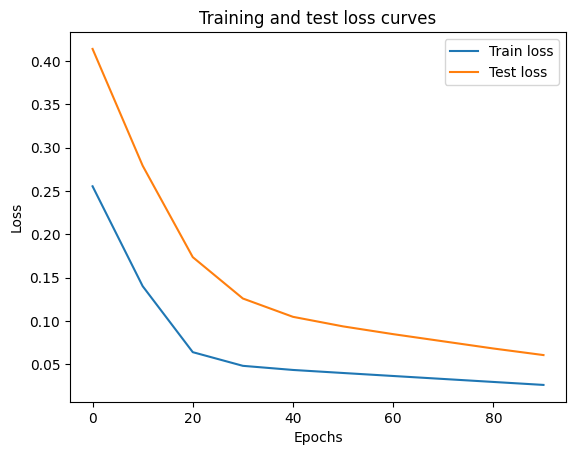

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

##4.Making predictions with a trained PyTorch model (inference)

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device

  y_preds = model_0(X_test)
y_preds

tensor([[0.8168],
        [0.8285],
        [0.8402],
        [0.8520],
        [0.8637],
        [0.8754],
        [0.8872],
        [0.8989],
        [0.9106],
        [0.9224]])

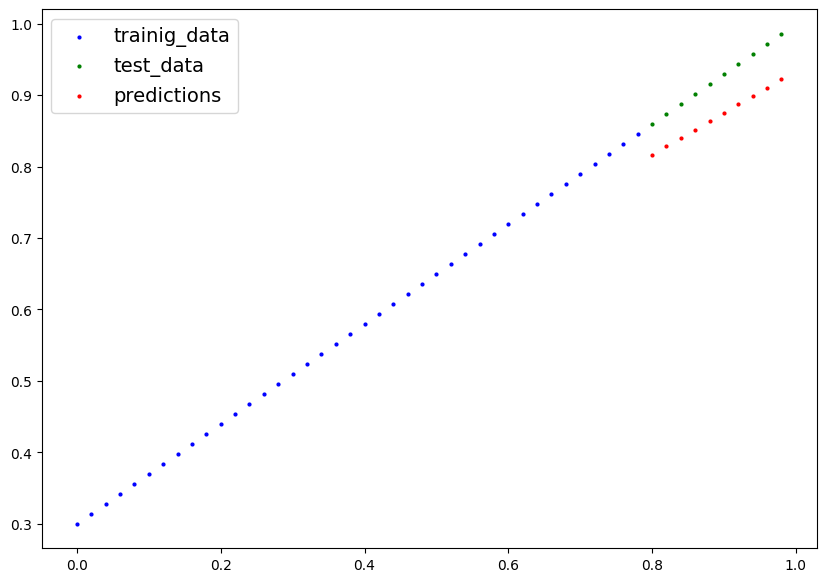

In [ ]:
plot_predictions(predictions=y_preds)

##5. Saving and loading  PyTorch MODEL
* torch.save()




* torch.load()
* torch.nn.Module.load_state_dict()

### Saving a PyTorch model's state_dict()
1. We'll create a directory for saving models to called models using Python's pathlib module.
2. We'll create a file path to save the model to.
3. We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's state_dict()

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

### Inference with loaded model

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])